Randomy initialize vector representations for words in N dimensional space, called embeddings, where through tuning these embeddings through backprop, the embeddings will move around in the space, such that similair words will be within a similiafr part of the space, and those with different values are within different parts. This allows for improved generalizing to novel scenarios, where for instance if you have a training exmaple such as "The cat is running in a room", a sentence such as "The dog is running in a ____" can be predicted to end in "room" since the nwtwork could learn cats and dogs are animals and can co-occur in different contexts

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
words = open("video_2_dependencies/names.txt").read().splitlines()
words[10:]

['abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia',
 'delilah',
 'arianna',
 'vivian',
 'kaylee',
 'sophie',
 'brielle',
 'madeline',
 'peyton',
 'rylee',
 '

In [3]:
len(words)

32033

In [5]:
#Build the vocabulary of characters and mappings to from integers
chars = sorted(list(set("".join(words))))
stoi = {char:idx+1 for idx, char in enumerate(chars)}
stoi["."] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [6]:
#build dataset

block_size = 3 #Context Length: How many characters dp we take to predict the next one?
X, Y = [], []
for w in words[:5]:

    print(w)
    context = [0] * block_size
    for ch in w + ".":
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)

        print("".join(itos[i] for i in context), "--->", itos[ix])
        context = context[1:] + [ix] #crop and append

X = torch.tensor(X) 
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [8]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [9]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [10]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [13]:
#Creating Embeddings for characters

C = torch.randn((27, 2)) #2-D embeddings

In [21]:
#Can access embeddings in two ways
C[5], F.one_hot(torch.tensor(5), num_classes = 27).float() @ C

#Note Long == Int

(tensor([-0.4602, -0.6537]), tensor([-0.4602, -0.6537]))

In [26]:
C[X]

tensor([[[-0.6260, -0.5492],
         [-0.6260, -0.5492],
         [-0.6260, -0.5492]],

        [[-0.6260, -0.5492],
         [-0.6260, -0.5492],
         [-0.4602, -0.6537]],

        [[-0.6260, -0.5492],
         [-0.4602, -0.6537],
         [ 0.9872,  0.3715]],

        [[-0.4602, -0.6537],
         [ 0.9872,  0.3715],
         [ 0.9872,  0.3715]],

        [[ 0.9872,  0.3715],
         [ 0.9872,  0.3715],
         [ 1.0517,  0.4103]],

        [[-0.6260, -0.5492],
         [-0.6260, -0.5492],
         [-0.6260, -0.5492]],

        [[-0.6260, -0.5492],
         [-0.6260, -0.5492],
         [ 0.4601, -0.9644]],

        [[-0.6260, -0.5492],
         [ 0.4601, -0.9644],
         [ 1.2220, -0.2192]],

        [[ 0.4601, -0.9644],
         [ 1.2220, -0.2192],
         [ 0.2711,  1.1588]],

        [[ 1.2220, -0.2192],
         [ 0.2711,  1.1588],
         [-0.8800, -0.5781]],

        [[ 0.2711,  1.1588],
         [-0.8800, -0.5781],
         [ 0.2711,  1.1588]],

        [[-0.8800, -0

In [27]:
X[13, 2]

tensor(1)

In [28]:
C[1]

tensor([1.0517, 0.4103])

In [29]:
C[X][13,2,:]

tensor([1.0517, 0.4103])

In [31]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [33]:
W1 = torch.randn((6, 100)); W1.requires_grad = True
b1 = torch.randn(100); b1.requires_grad = True

We need to concatenate the tensors together, to use as input to NN. Multiple different approaches though...

In [40]:
print(emb[:, 0, :].shape)
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], dim = 1)

torch.Size([32, 2])


tensor([[-0.6260, -0.5492, -0.6260, -0.5492, -0.6260, -0.5492],
        [-0.6260, -0.5492, -0.6260, -0.5492, -0.4602, -0.6537],
        [-0.6260, -0.5492, -0.4602, -0.6537,  0.9872,  0.3715],
        [-0.4602, -0.6537,  0.9872,  0.3715,  0.9872,  0.3715],
        [ 0.9872,  0.3715,  0.9872,  0.3715,  1.0517,  0.4103],
        [-0.6260, -0.5492, -0.6260, -0.5492, -0.6260, -0.5492],
        [-0.6260, -0.5492, -0.6260, -0.5492,  0.4601, -0.9644],
        [-0.6260, -0.5492,  0.4601, -0.9644,  1.2220, -0.2192],
        [ 0.4601, -0.9644,  1.2220, -0.2192,  0.2711,  1.1588],
        [ 1.2220, -0.2192,  0.2711,  1.1588, -0.8800, -0.5781],
        [ 0.2711,  1.1588, -0.8800, -0.5781,  0.2711,  1.1588],
        [-0.8800, -0.5781,  0.2711,  1.1588,  1.0517,  0.4103],
        [-0.6260, -0.5492, -0.6260, -0.5492, -0.6260, -0.5492],
        [-0.6260, -0.5492, -0.6260, -0.5492,  1.0517,  0.4103],
        [-0.6260, -0.5492,  1.0517,  0.4103, -0.8800, -0.5781],
        [ 1.0517,  0.4103, -0.8800, -0.5

In [42]:
#Will give list of tensors exactly as above, this allows us to use different block sizes
print(len(torch.unbind(emb, 1)))
torch.unbind(emb, 1)

3


(tensor([[-0.6260, -0.5492],
         [-0.6260, -0.5492],
         [-0.6260, -0.5492],
         [-0.4602, -0.6537],
         [ 0.9872,  0.3715],
         [-0.6260, -0.5492],
         [-0.6260, -0.5492],
         [-0.6260, -0.5492],
         [ 0.4601, -0.9644],
         [ 1.2220, -0.2192],
         [ 0.2711,  1.1588],
         [-0.8800, -0.5781],
         [-0.6260, -0.5492],
         [-0.6260, -0.5492],
         [-0.6260, -0.5492],
         [ 1.0517,  0.4103],
         [-0.6260, -0.5492],
         [-0.6260, -0.5492],
         [-0.6260, -0.5492],
         [ 0.2711,  1.1588],
         [-1.2957,  0.0522],
         [ 1.0517,  0.4103],
         [-0.1028, -0.6793],
         [-0.4602, -0.6537],
         [ 1.2220, -0.2192],
         [-0.6260, -0.5492],
         [-0.6260, -0.5492],
         [-0.6260, -0.5492],
         [-1.2957,  0.0522],
         [ 0.4601, -0.9644],
         [ 1.1754, -1.2647],
         [-0.1673,  1.4102]]),
 tensor([[-0.6260, -0.5492],
         [-0.6260, -0.5492],
         [-0

While the above works, we should instead use view. In Storage, Pytorch data is stored as 1-D vector, but when we call .view() we manipulate some attributes such that it is interpreted as an N-dimensional vector; but fundamentally no new memory is being created

In [46]:
emb.shape, emb.view(32, 6)

(torch.Size([32, 3, 2]),
 tensor([[-0.6260, -0.5492, -0.6260, -0.5492, -0.6260, -0.5492],
         [-0.6260, -0.5492, -0.6260, -0.5492, -0.4602, -0.6537],
         [-0.6260, -0.5492, -0.4602, -0.6537,  0.9872,  0.3715],
         [-0.4602, -0.6537,  0.9872,  0.3715,  0.9872,  0.3715],
         [ 0.9872,  0.3715,  0.9872,  0.3715,  1.0517,  0.4103],
         [-0.6260, -0.5492, -0.6260, -0.5492, -0.6260, -0.5492],
         [-0.6260, -0.5492, -0.6260, -0.5492,  0.4601, -0.9644],
         [-0.6260, -0.5492,  0.4601, -0.9644,  1.2220, -0.2192],
         [ 0.4601, -0.9644,  1.2220, -0.2192,  0.2711,  1.1588],
         [ 1.2220, -0.2192,  0.2711,  1.1588, -0.8800, -0.5781],
         [ 0.2711,  1.1588, -0.8800, -0.5781,  0.2711,  1.1588],
         [-0.8800, -0.5781,  0.2711,  1.1588,  1.0517,  0.4103],
         [-0.6260, -0.5492, -0.6260, -0.5492, -0.6260, -0.5492],
         [-0.6260, -0.5492, -0.6260, -0.5492,  1.0517,  0.4103],
         [-0.6260, -0.5492,  1.0517,  0.4103, -0.8800, -0.5781],


In [49]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) #use -1, PyTorch will infer the shape
h.shape

torch.Size([32, 100])

In [51]:
(emb.view(-1, 6) @ W1).shape

torch.Size([32, 100])

In [52]:
b1.shape
# 32 100
# _  100 (aling right) - > 1 100 (create fake dimension) -> row vector -> copied vertically -> 32 100 -> element wise addition 

torch.Size([100])

In [53]:
W2 = torch.randn((100, 27)); W2.requires_grad = True
b2 = torch.randn(27); b2.requires_grad = True

In [55]:
logits = h @ W2 + b2

In [56]:
logits.shape

torch.Size([32, 27])

In [57]:
counts = logits.exp()
probs = counts/(counts.sum(1, keepdim=True))

In [59]:
probs.shape, probs.sum(1)

(torch.Size([32, 27]),
 tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>))

In [61]:
loss = -probs[torch.arange(len(probs)), Y].log().mean()
loss

tensor(15.2789, grad_fn=<NegBackward0>)

In [62]:
#Cleaning Code

In [67]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator = g)
W1 = torch.randn((6, 100), generator = g)
b1 = torch.randn((100), generator= g)
W2 = torch.randn((100, 27), generator = g)
b2 = torch.randn((27), generator = g)
parameters = [C, W1, b1, W2, b2]

In [68]:
sum(p.nelement() for p in parameters)

3481

In [76]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
# counts = logits.exp()
# probs = counts/counts.sum(1, keepdim=True)
# loss = -probs[torch.arange(len(probs)), Y].log().mean()
loss = F.cross_entropy(logits, Y)

print(loss)

tensor(17.7697)


In [75]:
F.cross_entropy(logits, Y)

tensor(17.7697)

Use F.crossentropy, preserves memory by not requiring these intermediate tensors, insteads clusters these operations into fused kernals which very efficiently generate operations. Also much more simpler backward pass to implement (i.e remember in micrograd where we had TanH operation and how using it's derivative was much simpler then breaking down TanH into components and the derivatives of these intermediates)

Also has improves numerical behaviour, as explained below...

In [79]:
logits = torch.tensor([-100, -3, 0, 100])
counts = logits.exp()
probs = counts/counts.sum()
counts, probs

#We cannot pass large logits through this expression

(tensor([3.7835e-44, 4.9787e-02, 1.0000e+00,        inf]),
 tensor([0., 0., 0., nan]))

In [80]:
logits = torch.tensor([-10, -3, 0, 10])
counts = logits.exp()
probs = counts/counts.sum()
counts, probs


(tensor([4.5400e-05, 4.9787e-02, 1.0000e+00, 2.2026e+04]),
 tensor([2.0611e-09, 2.2602e-06, 4.5398e-05, 9.9995e-01]))

In [83]:
logits = torch.tensor([-10, -3, 0, 10]) - 3
counts = logits.exp()
probs = counts/counts.sum()
counts, probs

#Interestingly, we can offset logits by an arbitrary constant value, and the probs will remain the same

(tensor([2.2603e-06, 2.4788e-03, 4.9787e-02, 1.0966e+03]),
 tensor([2.0611e-09, 2.2602e-06, 4.5398e-05, 9.9995e-01]))

In [84]:
#F.cross entropy will internally subtract it by the maximum value in the tensor

logits = torch.tensor([-10, -3, 0, 10]) - 5
counts = logits.exp()
probs = counts/counts.sum()
counts, probs


(tensor([3.0590e-07, 3.3546e-04, 6.7379e-03, 1.4841e+02]),
 tensor([2.0611e-09, 2.2602e-06, 4.5398e-05, 9.9995e-01]))

In [85]:
for p in parameters:
    p.requires_grad = True

In [88]:
for _ in range(1000):
    #Forward pass
    emb = C[X]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)

    for p in parameters:
        p.grad = None


    loss.backward()

    for p in parameters:
        p.data -= p.grad*0.1


print(loss.item())

0.255603164434433


Getting good performance, since have 3000 parameters, and 32 examples, so overfitting on the batch of data

In [89]:
logits.max(1)

torch.return_types.max(
values=tensor([13.4138, 17.9644, 20.6772, 20.7267, 16.8571, 13.4138, 16.1147, 14.2718,
        16.0140, 18.5009, 16.0738, 21.0530, 13.4138, 17.2577, 17.2659, 20.2016,
        13.4138, 16.7053, 15.2578, 17.2021, 18.6942, 16.1057, 10.9961, 10.7943,
        15.5882, 13.4138, 16.2897, 17.0882, 12.8241, 16.2913, 19.2259, 16.1885],
       grad_fn=<MaxBackward0>),
indices=tensor([19, 13, 13,  1,  0, 19, 12,  9, 22,  9,  1,  0, 19, 22,  1,  0, 19, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [91]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

Doesnt get perfect performance because in the training set ... can lead e,s, a, or o

In [94]:
#build dataset

block_size = 3 #Context Length: How many characters dp we take to predict the next one?
X, Y = [], []
for w in words:

    context = [0] * block_size
    for ch in w + ".":
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix] #crop and append

X = torch.tensor(X) 
Y = torch.tensor(Y)

In [95]:
X.shape

torch.Size([228146, 3])

In [129]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator = g)
W1 = torch.randn((6, 100), generator = g)
b1 = torch.randn((100), generator= g)
W2 = torch.randn((100, 27), generator = g)
b2 = torch.randn((27), generator = g)
parameters = [C, W1, b1, W2, b2]

In [130]:
for p in parameters:
    p.requires_grad = True

In [114]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [108]:
for _ in range(100):

    #minibatch (avoids excess computational work of forwarding through all 200000 examples)
    ix = torch.randint(0, X.shape[0], (32,))

    #Forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    for p in parameters:
        p.grad = None
    
    loss.backward()

    for p in parameters:
        p.data -= p.grad*0.1

print(loss.item())

2.221015453338623


minibatch allows us to run many examples fast and decrease the loss much faster

However, the quality of the gradients is lower, so the direction is not as reliable (is not the actual direction) but the gradient direction is good enough that it is useful. It is much better to have aprox. gradient with multiple steps, then evaluate the exact gradient and take fewer steps

In [109]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
print(loss)

tensor(2.4512, grad_fn=<NllLossBackward0>)


Finding a good LR,

- low end: should be decreasing at a slow rate
- high end: where loss explodes (i.e unstable, goes up and down quite a bit)

In [126]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [127]:
lri = []
lossi = []

for i in range(1000):
#LR rate going to start very low, then will go to 1

    ix = torch.randint(0, X.shape[0], (32,))

    #Forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    for p in parameters:
        p.grad = None
    
    loss.backward()

    for p in parameters:
        p.data -= p.grad*lrs[i]

    #track stats
    lri.append(lre[i])
    lossi.append(loss.item())

# print(loss.item())

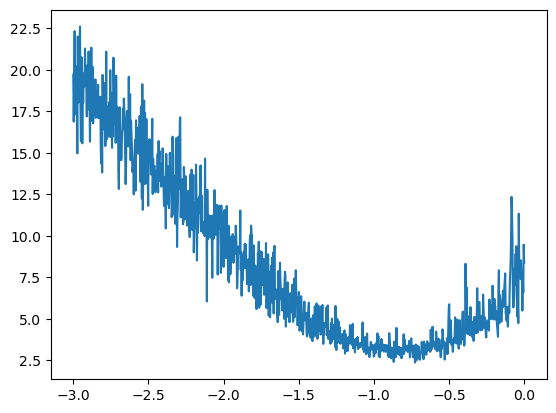

In [128]:
plt.plot(lri, lossi)

Can see, at the start had very low LR, where barely anything happened, then found a nice spot (around 10**-1 to 10**-0.5), and then if you increased the LR enough, started to get unstable

In [142]:

for i in range(5000):
#LR rate going to start very low, then will go to 1

    ix = torch.randint(0, X.shape[0], (32,))

    #Forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    for p in parameters:
        p.grad = None
    
    loss.backward()

    for p in parameters:
        p.data -= p.grad*(10**-2)


print(loss.item())

2.0584003925323486


Find a decent LR, training a while, then do ...

Learning Rate Decay: where you reduce the LR by 10x, where at later stages in training might want to go a bit slower, train for a fewe more steps

Notes got deleted so TLDR and screenshots...

Train: Optimize params
Val: Optimize Hyperparams
Test: Needed to test model performance on unseen data, to ensure model is not simply memorizing training data

Underfit: Val Loss == Train Loss, should increase model params/scale NN to improve performance (i.e larger hidden layers or embedding)
Overfit, we start to see divergence between val and train loss; indicates we might have enough params

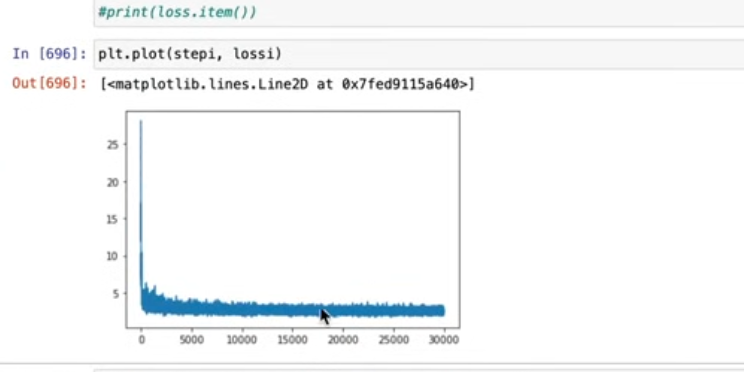

Can see some thickness, beccaue optimizing using minibatches, and it creates some noise, One problem could be that the batch size is so low that we have way too much noise in the training, and we increase the batch size to get a more accurate gradient and not thrash too much and optimize properly